# Import libraries

In [1]:
# ! pip install faker 

In [2]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import warnings
warnings.simplefilter('ignore')

In [3]:
fake = Faker()
start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 1)

In [4]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [5]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

3
(102, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
97,Douala,Douala,4.0500,9.7000,Cameroon,CM,CMR,Littoral,admin,5768400.0,1120494607
333,Yaoundé,Yaounde,3.8667,11.5167,Cameroon,CM,CMR,Centre,primary,2440462.0,1120298240
417,Bamenda,Bamenda,5.9614,10.1517,Cameroon,CM,CMR,North-West,admin,2000000.0,1120909610
1249,Garoua,Garoua,9.3000,13.4000,Cameroon,CM,CMR,Nord,admin,600000.0,1120803808
1250,Bafoussam,Bafoussam,5.4667,10.4167,Cameroon,CM,CMR,Ouest,admin,600000.0,1120435460


#### city repartition

In [6]:
# les villes les plus peuplés doivent avoir le plus de transaction

city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [7]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)


In [8]:
# création de la première partie du dataFrame avant d'ajouter la répartition selon les villes
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = fake.phone_number()
    registration_date = fake.date_between(datetime(2005,1,1), datetime(2018,1,1))
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:43<00:00, 228.37it/s]


(10000, 8)


In [9]:
# scinder le df pour attribuer le plus de population aux grandes villes
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [10]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,3690ac9fb2724cd0921a9e196a128fe1,Joseph,Alvarado,Joseph.Alvarado@ortega.com,+237 655777212,2016-09-12,1971-09-10,"2734 Vanessa Ports Suite 010\nMichelleberg, MN...",Bamenda,North-West
1,e25e1f2edc234162bcb914a95397f259,Sara,Thompson,Sara.Thompson@stuart-wilson.com,+237 654044240,2016-05-15,1960-07-14,"038 David Pines\nSouth Juanmouth, VT 52087",Bamenda,North-West
2,42c5133da168479a8ceb49d7ec6454f7,Blake,Wheeler,Blake.Wheeler@jenkins.com,+237 653049060,2016-10-21,1965-05-08,"0115 Perkins Ports\nOlivershire, NE 36010",Douala,Littoral
3,9b32b433b97e494f8150b1b6aa3d6c46,Melanie,Sharp,Melanie.Sharp@osborn.net,+237 676356820,2006-01-09,1983-08-12,"451 Moon Park Apt. 463\nMcphersonstad, MA 16063",Bafoussam,Ouest
4,2e9003baf3b74b339c6fa98377dc2fbd,Deborah,Boyer,Deborah.Boyer@edwards.com,+237 654539474,2008-05-10,1954-01-22,"826 Austin Mill Suite 500\nBaileyville, IN 79796",Douala,Littoral


In [11]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,cb592a2cc46f4be08024d052c3d4871d,Cassandra,Jones,Cassandra.Jones@green.info,+237 695637100,2015-01-19,1973-01-01,4351 Joshua Shoal Apt. 979\nPort Josephborough...,Yaoundé,Centre
1,ed51a44239fe4f528fcdaeca201d085f,Natasha,Hall,Natasha.Hall@spencer-morgan.org,+237 671804639,2008-03-26,1949-11-25,"68419 Daniel Burgs\nJudyfort, UT 80496",Yaoundé,Centre
2,991a79d5576c4228b79d0876bb6b73d9,Adam,Finley,Adam.Finley@smith-sloan.info,+237 699459069,2013-01-04,1968-04-08,"87776 Lester Canyon Apt. 916\nFeliciamouth, PR...",Douala,Littoral
3,39b1065d6c75498eae21101bec6242ff,John,Duncan,John.Duncan@simmons-smith.com,+237 683241834,2015-07-12,1984-07-04,04229 Theresa Estates Suite 774\nWest Jennifer...,Bafoussam,Ouest
4,6c9f4b61a9c5481b985505b8903632e4,Christine,Schwartz,Christine.Schwartz@kelly-harvey.com,+237 694680816,2017-06-22,1969-06-17,"446 Jackson Harbor\nSouth Julie, DE 93583",Garoua,Nord


In [12]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,fae3ac0e7ceb4d3eaf5b124af9bb6a2c,Jane,Hanson,Jane.Hanson@watson.com,+237 695688999,2007-08-03,1972-05-28,"4846 Evan Mews Apt. 560\nNew Angela, TN 39301",Bafut,North-West
1,ee81c2b956444e079b6132e2a9450852,Daniel,Fowler,Daniel.Fowler@smith-bates.com,+237 657541314,2013-12-11,1972-02-22,"63701 Sanchez Orchard\nPort Amy, NE 59775",Aba,Abia
2,6747ada5bce04c7881b94c325a8cc41a,Elizabeth,Cameron,Elizabeth.Cameron@hughes.com,+237 692557322,2007-04-27,1984-06-29,"57898 Thomas Turnpike\nWest Tracy, RI 22379",Diang,Est
3,e5e80d08a8094bae963592c738558857,Sarah,Adams,Sarah.Adams@hill.com,+237 657521150,2011-04-21,1952-07-20,"0762 William Mountain\nAnitamouth, NE 48282",Mbandjok,Centre
4,176808be9131407ca0a9d5a8f2ef7f74,Michael,Newton,Michael.Newton@ford.biz,+237 679409479,2016-07-11,1981-04-21,"03205 Robinson Park\nGrahamview, AK 23094",Obala,Centre


In [13]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,3690ac9fb2724cd0921a9e196a128fe1,Joseph,Alvarado,Joseph.Alvarado@ortega.com,+237 655777212,2016-09-12,1971-09-10,"2734 Vanessa Ports Suite 010\nMichelleberg, MN...",Bamenda,North-West
1,e25e1f2edc234162bcb914a95397f259,Sara,Thompson,Sara.Thompson@stuart-wilson.com,+237 654044240,2016-05-15,1960-07-14,"038 David Pines\nSouth Juanmouth, VT 52087",Bamenda,North-West
2,42c5133da168479a8ceb49d7ec6454f7,Blake,Wheeler,Blake.Wheeler@jenkins.com,+237 653049060,2016-10-21,1965-05-08,"0115 Perkins Ports\nOlivershire, NE 36010",Douala,Littoral
3,9b32b433b97e494f8150b1b6aa3d6c46,Melanie,Sharp,Melanie.Sharp@osborn.net,+237 676356820,2006-01-09,1983-08-12,"451 Moon Park Apt. 463\nMcphersonstad, MA 16063",Bafoussam,Ouest
4,2e9003baf3b74b339c6fa98377dc2fbd,Deborah,Boyer,Deborah.Boyer@edwards.com,+237 654539474,2008-05-10,1954-01-22,"826 Austin Mill Suite 500\nBaileyville, IN 79796",Douala,Littoral


In [14]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [15]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:15<00:00, 6553.11it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,31d420fd-2297-42c3-800c-0e997b9f2524,mobile,ios,Apple,iphone Xr,2021-02-25 19:16:08
1,37dc5ba9-c5bf-45b9-b122-ab13ca8b16cc,mobile,mac,SONY,Xperia 5 II,2022-01-29 04:11:27
2,66949cd2-042c-498a-8a50-175d581994ca,tablette,android,Sharp,aquos sense 5g,2020-08-15 00:34:29
3,0bcd3758-5ea7-4c6d-be42-83d527413899,tablette,mac,SONY,Xperia 5 II,2020-07-10 20:43:42
4,a4407a5b-0052-4e23-adc1-7360aafe1b47,mobile,android,dell,XPS 13,2020-03-09 14:37:24
...,...,...,...,...,...,...
99995,c35a30c0-0edf-4bb2-a468-da52b444b5a2,mobile,windows,LG,NanoCell TV,2023-02-04 13:33:30
99996,3e403a64-49d4-4ad7-b803-ab0fc5a18f5c,tablette,linux,SONY,Xperia 5 II,2021-09-13 06:50:05
99997,79263a93-5919-4ef9-a6b1-1903e36ee3b9,mobile,android,dell,XPS 13,2023-10-04 07:56:37
99998,2e0757e8-b86c-4358-9e13-9d156c83aaf3,tablette,linux,HP,spectre x360,2022-08-05 10:09:11


In [16]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [17]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(status):
    if status == "échouée":
        return 1
    else:
        return 0
    

trend_factor = 1.0001
seasonal_amplitude = 0.3
seasonal_period = 365 


for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choices(["retrait", "depôt", "transfert"], weights=[0.25, 0.5, 0.25])[0] # liste pondérée
    device_id = random.choice(list(devices["device_id"]))
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée
    days_between = (end_date - start_date).days
    transaction_date = start_date + timedelta(days=random.randint(0, days_between))

    # Calcul de la tendance
    days_since_start = (transaction_date - start_date).days
    trend = trend_factor ** days_since_start

    # Calcul de la saisonnalité
    seasonal_effect = 1 + seasonal_amplitude * np.sin(2 * np.pi * days_since_start / seasonal_period)

    # Montant ajusté par la tendance et la saisonnalité
    base_amount = random.uniform(100, 10000000)
    amount = base_amount * trend * seasonal_effect

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_date": transaction_date,
        "transaction_type": transaction_type,
        "amount": amount,
        "status": status,
        "is_fraud": is_fraud_trans(status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

100%|██████████| 100000/100000 [1:03:32<00:00, 26.23it/s]


(100000, 8)


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud
0,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,2020-02-12,depôt,9.385805e+06,réussie,0
1,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,2022-02-03,depôt,3.358191e+06,réussie,0
2,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,2019-11-09,depôt,7.307758e+06,réussie,0
3,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,2018-07-18,transfert,3.127519e+06,réussie,0
4,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,2019-12-29,retrait,4.435274e+06,réussie,0


In [46]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [47]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [48]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [49]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [50]:
transaction_df_ = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_.shape 

(100000, 9)

In [51]:
transaction_df_.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [52]:
is_fraud_list = []
for transaction in tqdm(transaction_df_.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_.head()

100000it [00:16, 6078.69it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,2020-02-12,depôt,9.385805e+06,réussie,0,Douala
1,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,2022-02-03,depôt,3.358191e+06,réussie,0,Bafoussam
2,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,2019-11-09,depôt,7.307758e+06,réussie,0,Bafoussam
3,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,2018-07-18,transfert,3.127519e+06,réussie,0,Bafoussam
4,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,2019-12-29,retrait,4.435274e+06,réussie,0,Yaoundé


### device_fraud

In [53]:
selection = pd.DataFrame(transaction_df_.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
is_fraud_list = []
for transaction in tqdm(transaction_df_.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_.head()

100000it [01:07, 1490.33it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,2020-02-12,depôt,9.385805e+06,réussie,0,Douala
1,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,2022-02-03,depôt,3.358191e+06,réussie,0,Bafoussam
2,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,2019-11-09,depôt,7.307758e+06,réussie,1,Bafoussam
3,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,2018-07-18,transfert,3.127519e+06,réussie,1,Bafoussam
4,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,2019-12-29,retrait,4.435274e+06,réussie,0,Yaoundé


In [54]:
transaction_df_final = transaction_df_
transaction_df_final.head()

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,2020-02-12,depôt,9.385805e+06,réussie,0,Douala
1,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,2022-02-03,depôt,3.358191e+06,réussie,0,Bafoussam
2,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,2019-11-09,depôt,7.307758e+06,réussie,1,Bafoussam
3,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,2018-07-18,transfert,3.127519e+06,réussie,1,Bafoussam
4,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,2019-12-29,retrait,4.435274e+06,réussie,0,Yaoundé


In [55]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['amount'] >= 7000000:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:09, 10044.67it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,2020-02-12,depôt,9.385805e+06,réussie,1,Douala
1,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,2022-02-03,depôt,3.358191e+06,réussie,0,Bafoussam
2,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,2019-11-09,depôt,7.307758e+06,réussie,1,Bafoussam
3,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,2018-07-18,transfert,3.127519e+06,réussie,1,Bafoussam
4,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,2019-12-29,retrait,4.435274e+06,réussie,0,Yaoundé


In [56]:
transaction_df_final.is_fraud.value_counts()

is_fraud
1    56707
0    43293
Name: count, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

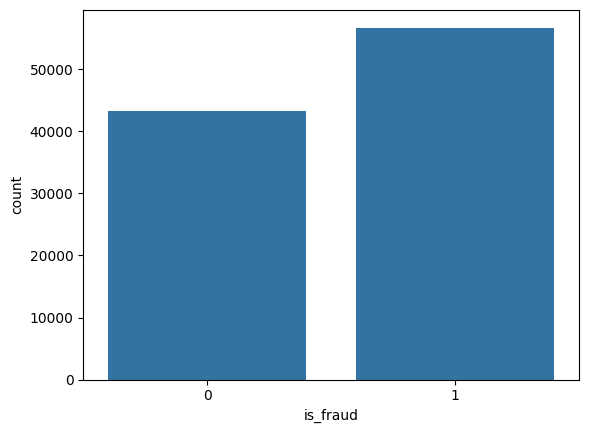

In [57]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [58]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [59]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:20, 4879.12it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,1e9c3c0fc0b1496d8d2901d0f8f3531d,d159ae25b3d04387bbc006b8f0df4629,731b17cfadce442ab756b5b110a406c2,1.933918e+07,2.872498e+07,2020-02-12
1,d9970217233245029374bceecdc315c0,84d0894d1b9a4a8dbe13cfbb32d451df,96f4ac611eaa4174b39149d98e569810,9.557160e+06,1.291535e+07,2022-02-03
2,76fcc12cfc944467b6465cd0aba2893c,b01c160bdd134ac989f1d0d0163ac149,1c11b97ba2994efbb6f85291e7062e00,1.430163e+07,2.160939e+07,2019-11-09
3,3bb9c05095104929b845b85e2daa86e8,31bd9c0aa340439899f52de6d89ac6eb,99d146a3fbd04a38a5b83190b4ec22e3,7.646344e+06,4.518825e+06,2018-07-18
4,64f19595555c42c5ae3d1fb9eb17c793,ade32958209d40cfb475e5bef5a2b4a3,bdab6a6430b44fadbf2f1682ccda4ae8,9.679731e+06,5.244457e+06,2019-12-29


In [60]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [61]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       3690ac9fb2724cd0921a9e196a128fe1
1       e25e1f2edc234162bcb914a95397f259
2       42c5133da168479a8ceb49d7ec6454f7
3       9b32b433b97e494f8150b1b6aa3d6c46
4       2e9003baf3b74b339c6fa98377dc2fbd
                      ...               
9995    5841aae020f94c219fe89a43cf0c9f8b
9996    f17b435720d74e51a2578ea19ba0bbe2
9997    5067dabd84614324be81e6262b3d2ce5
9998    90aabcc287df474fbcbc63079204ab42
9999    2949a9bff0c04b33bf582b02fe0c45da
Name: customer_id, Length: 10000, dtype: object


In [62]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:20<00:00, 4849.47it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,64743e92-5cea-4c00-a96b-9d8d08b946ba,aecb8ca4c0674a4298838ee344ddcaad,706.25,6,Port Timothy,mobile
1,53befe03-ff9c-47c7-8660-b5d724b72dab,6b81fc46738e4064a42e56eba9c1d451,480.15,2,Port Martinview,tablette
2,335fbfd0-775b-4c7d-a041-a13041595022,63657236768944f088cb3e058caec548,406.57,16,New Julieton,tablette
3,00e31079-e001-4731-845f-9acd8a6d3672,593d138b2c744a208c041d3bc823ef48,638.10,28,Josephport,tablette
4,65b5675f-8689-4529-9567-bf4f96075ee0,c896493082414bee969725fc08c17616,283.18,23,Kyleville,mobile
...,...,...,...,...,...,...
99995,900ed821-6dd3-42e6-a61c-be31b6c1a6de,ec02bbc433024e42a5de8ef3dd2a6481,836.95,29,Ramirezfort,mobile
99996,9173e5e2-23c1-4f13-886a-d94682530518,5bd6f30f6b1c403fa6d4caf87cf86cb0,75.76,30,South Brianshire,tablette
99997,af71d7f5-0fca-4030-a802-e922c15dcc0c,4323a562779c455795fcbfc227efb319,984.63,27,Wellstown,mobile
99998,3e3df559-9d10-44d3-ad19-86a3e0e9ae87,6586722ad49a4f2ba5668e72fd428288,706.69,19,Port Tiffanyshire,tablette


In [63]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [64]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 2488.67it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,51a83841-582a-49f0-b1b7-534b593f02d8,19a371c6131c4fadaaa4b59555d41927,2022-04-25 03:40:24,large transaction,closed,Woman life might health ever statement range.\...
1,3eb26fef-a1cf-49e2-ba05-23c0c72a4f7f,5462c26c89794e108f33acd5a6aba434,2020-05-08 18:50:52,large transaction,open,Both his benefit especially development wester...
2,b9103754-365e-42c6-a263-3cd296504dcd,8ad7f3906e4d410988894e9983e21cad,2021-09-10 03:36:03,large transaction,closed,Structure night election civil old. White boy ...
3,5df28a26-9f75-40bc-82a2-a2a43da4f3b8,b9504927c22846babb4943e2597f11c9,2022-04-02 08:03:32,suspicious activity,closed,White big create light blood commercial countr...
4,acc68d65-0fea-4541-a7aa-e0982fdfd4fe,1fc48491d2724c8fb2c3d7ab08c339c8,2024-02-22 10:38:47,large transaction,open,Look her cost. Later which black computer.\nLi...
...,...,...,...,...,...,...
95,a3691dfb-32fd-4dde-bc53-7c81b7a44e7d,244b27709baf45c49a02455eb9ce4834,2023-10-11 00:17:06,suspicious activity,open,Half today at small medical mind crime. Includ...
96,b16592fa-7f1e-47ae-b3c7-036caf9f1bc5,f3573c22bfce44909544faee64849e34,2020-01-02 23:14:28,suspicious activity,open,From feel consumer low trial. Marriage profess...
97,a272ab65-dba2-45bd-be77-f62b8a0bb4de,026ddb4c8e4c41d9b1d79b0c2645f51b,2022-05-26 15:52:16,suspicious activity,open,Soon for economy billion situation box. Becaus...
98,690bde2c-d0fe-46f2-85da-6a5d4c6c47be,c3e5e0f44101408a992d919dd8306b7c,2023-12-26 07:49:51,suspicious activity,open,Near letter responsibility born term she. Mode...


In [65]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

In [66]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import uuid 
from faker import Faker
from datetime import datetime, timedelta


In [67]:


def generate_ID():
  return str(uuid.uuid1())


    
transaction_id_list = transaction_df["transaction_id"].tolist()
customer_id_list = customer_df["customer_id"].tolist()
                         
    
    


In [68]:
nb = 1000
generate_id_case = [generate_ID() for i in tqdm(range(nb))]
generate_id_transaction = [random.choice([transaction_id_list]) for i in tqdm(range(nb))]
generate_id_customer = [random.choice(customer_id_list) for i in tqdm(range(nb))]

#generation des données 
Data = {
  "case_id" : generate_id_case,
  "transaction_id" : generate_id_transaction,
  "customer_id" : generate_id_customer,
  "fraud_type" :[random.choice(["identity theft"," account takeover"]) for i in tqdm(range(nb))],
  "detection_Date" : [fake.date_between(start_date, end_date) for i in tqdm(range(nb))],
  "resolution_status" : [random.choice(["pending", "resolved"]) for i in tqdm(range(nb))],
  "comment_fraud" : [ fake.text(50) for i in tqdm(range(nb))],
}


100%|██████████| 1000/1000 [00:00<00:00, 14443.05it/s]


In [69]:
fraud_df = pd.DataFrame(Data)
print(fraud_df.shape)
fraud_df.head()


(1000, 7)


,case_id,transaction_id,customer_id,fraud_type,detection_Date,resolution_status,comment_fraud
0,02bfc585-48c8-11ef-ad2e-9cb6d0da64b6,"[731b17cfadce442ab756b5b110a406c2, 96f4ac611ea...",e183df707f674d48a9db1a05a8f3ecde,identity theft,2022-11-14,resolved,Thousand away wear worker size too.
1,02bfc586-48c8-11ef-a306-9cb6d0da64b6,"[731b17cfadce442ab756b5b110a406c2, 96f4ac611ea...",a99125b0015246e0b5d8a25519933f4d,identity theft,2020-01-31,resolved,And share truth type likely order leader.
2,02bfc587-48c8-11ef-bb56-9cb6d0da64b6,"[731b17cfadce442ab756b5b110a406c2, 96f4ac611ea...",8c93c4ab10a5406eb4acdfe1d82c3503,identity theft,2023-12-11,resolved,Able give war arm start.
3,02bfc588-48c8-11ef-8008-9cb6d0da64b6,"[731b17cfadce442ab756b5b110a406c2, 96f4ac611ea...",d6a68ff290e949a6a644673ee948af46,account takeover,2023-04-26,pending,Guy study seven prevent collection site provide.
4,02bfc589-48c8-11ef-8ab3-9cb6d0da64b6,"[731b17cfadce442ab756b5b110a406c2, 96f4ac611ea...",ffbeca59b0a14980959b3355c5016534,account takeover,2023-03-09,pending,List enough even. Pull three painting minute.


## regions data

In [70]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [71]:
import os 
os.sep

'\\'

In [72]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'